In [2]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\saeem\Desktop\Epilepsy\BEED_Data.csv"
df = pd.read_csv(file_path)

# Basic exploration
shape = df.shape
columns = df.columns.tolist()
missing_values = df.isnull().sum()
data_types = df.dtypes

# Display label distribution
label_distribution = df['y'].value_counts().sort_index()

# Preview first few rows
preview = df.head()

shape, columns, missing_values, data_types, label_distribution, preview

((8000, 17),
 ['X1',
  'X2',
  'X3',
  'X4',
  'X5',
  'X6',
  'X7',
  'X8',
  'X9',
  'X10',
  'X11',
  'X12',
  'X13',
  'X14',
  'X15',
  'X16',
  'y'],
 X1     0
 X2     0
 X3     0
 X4     0
 X5     0
 X6     0
 X7     0
 X8     0
 X9     0
 X10    0
 X11    0
 X12    0
 X13    0
 X14    0
 X15    0
 X16    0
 y      0
 dtype: int64,
 X1     int64
 X2     int64
 X3     int64
 X4     int64
 X5     int64
 X6     int64
 X7     int64
 X8     int64
 X9     int64
 X10    int64
 X11    int64
 X12    int64
 X13    int64
 X14    int64
 X15    int64
 X16    int64
 y      int64
 dtype: object,
 y
 0    2000
 1    2000
 2    2000
 3    2000
 Name: count, dtype: int64,
     X1   X2   X3   X4   X5   X6  X7  X8  X9  X10  X11  X12  X13  X14  X15  \
 0    4    7   18   25   28   27  20  10 -10  -18  -20  -16   13   32   12   
 1   87  114  120  106   76   54  28   5 -19  -49  -85 -102 -100  -89  -61   
 2 -131 -133 -140 -131 -123 -108 -58 -51 -70  -77  -76  -76  -73  -57  -40   
 3   68  104   73 

C:\Users\saeem\AppData\Local\Temp\ipykernel_26672\52729823.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('y').apply(lambda x: x.sample(5, random_state=42)).reset_index(drop=True)


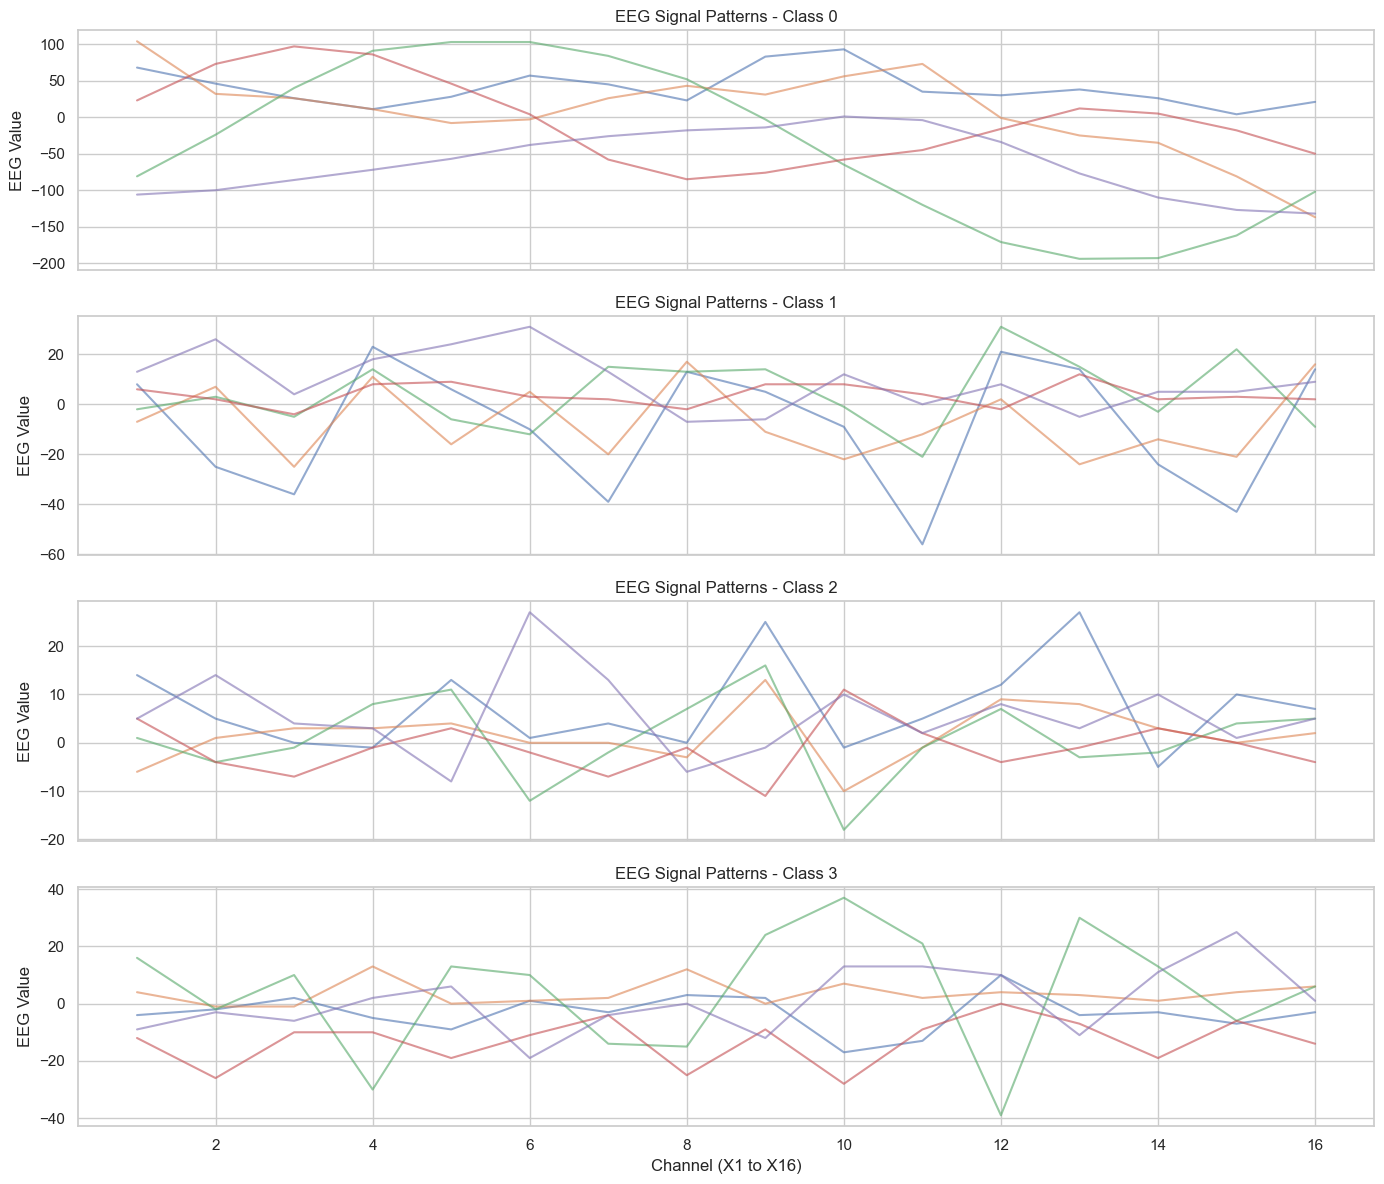

C:\Users\saeem\AppData\Local\Temp\ipykernel_26672\52729823.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_cols, y=means, ax=ax[0], palette="Blues_d")
C:\Users\saeem\AppData\Local\Temp\ipykernel_26672\52729823.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_cols, y=stds, ax=ax[1], palette="Oranges_d")


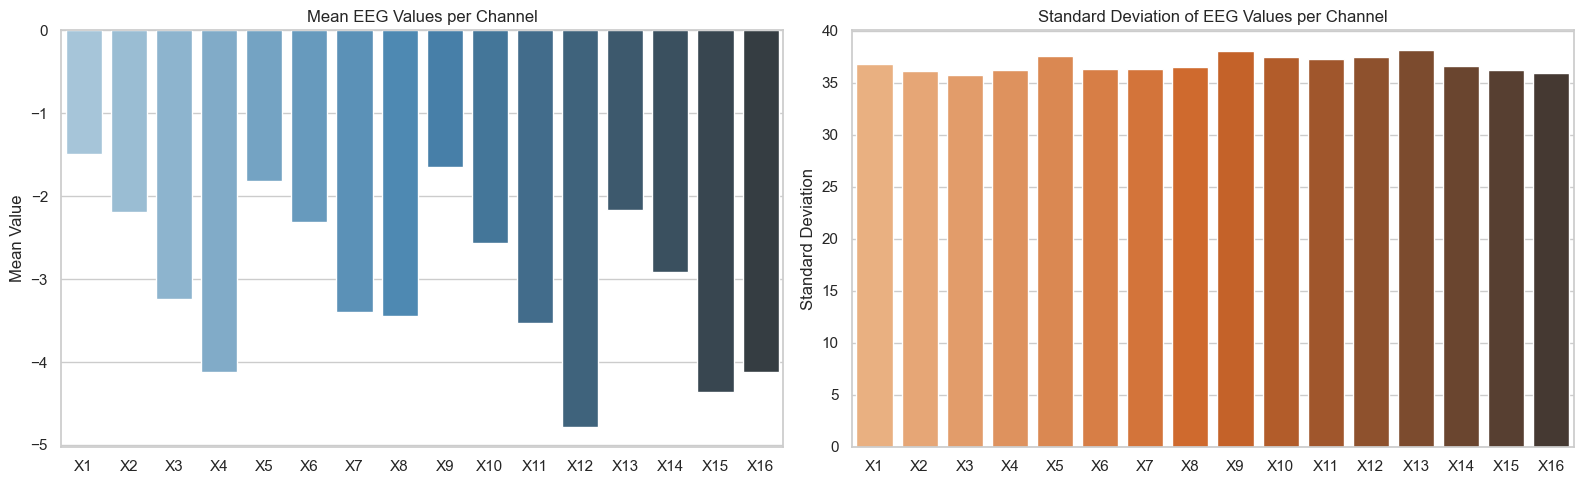

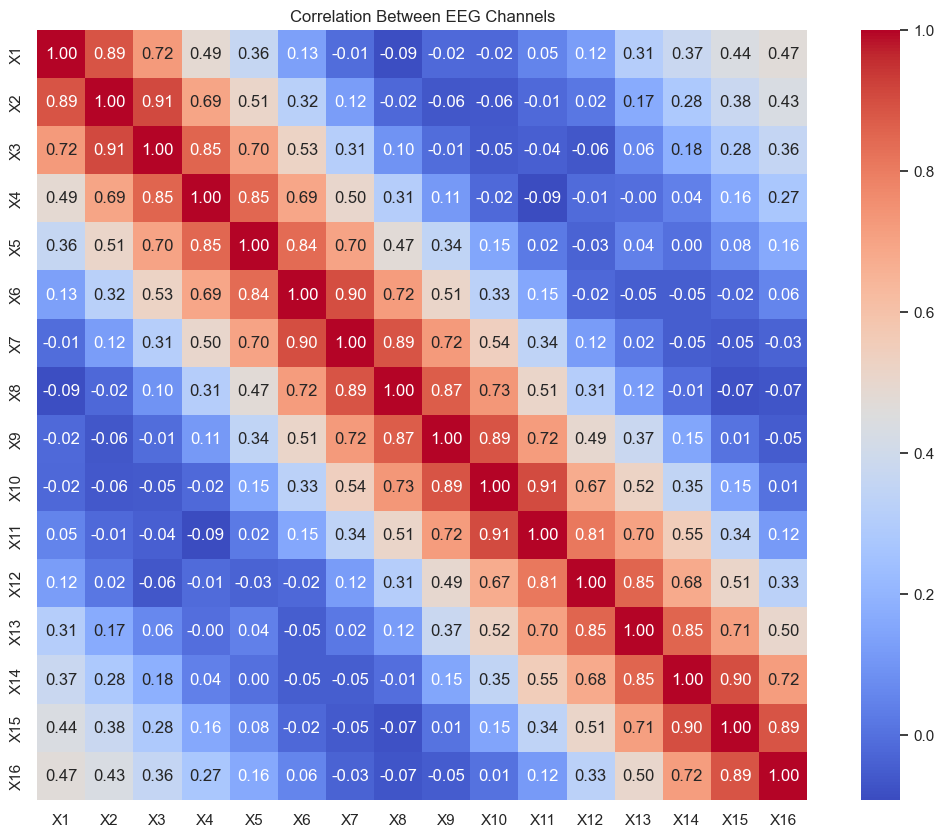

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Sample 5 rows from each class for visualization
sampled_df = df.groupby('y').apply(lambda x: x.sample(5, random_state=42)).reset_index(drop=True)

# 1. Visualize EEG signals from each class
fig, axes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)
for i, label in enumerate(sorted(df['y'].unique())):
    subset = sampled_df[sampled_df['y'] == label]
    for _, row in subset.iterrows():
        axes[i].plot(range(1, 17), row.iloc[:-1], alpha=0.6)
    axes[i].set_title(f"EEG Signal Patterns - Class {label}")
    axes[i].set_ylabel("EEG Value")
axes[-1].set_xlabel("Channel (X1 to X16)")
plt.tight_layout()
plt.show()

# 2. Plot EEG channel statistics (mean and std)
channel_cols = [f'X{i}' for i in range(1, 17)]
means = df[channel_cols].mean()
stds = df[channel_cols].std()

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.barplot(x=channel_cols, y=means, ax=ax[0], palette="Blues_d")
ax[0].set_title("Mean EEG Values per Channel")
ax[0].set_ylabel("Mean Value")

sns.barplot(x=channel_cols, y=stds, ax=ax[1], palette="Oranges_d")
ax[1].set_title("Standard Deviation of EEG Values per Channel")
ax[1].set_ylabel("Standard Deviation")

plt.tight_layout()
plt.show()

# 3. Correlation heatmap between EEG channels
correlation_matrix = df[channel_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Between EEG Channels")
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and labels
X = df.drop(columns='y')
y = df['y']

# Normalize EEG channel data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Summary of preprocessing
X_train.shape, X_test.shape, y_train.value_counts().sort_index(), y_test.value_counts().sort_index()


((6400, 16),
 (1600, 16),
 y
 0    1600
 1    1600
 2    1600
 3    1600
 Name: count, dtype: int64,
 y
 0    400
 1    400
 2    400
 3    400
 Name: count, dtype: int64)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np

# --- Classical ML Models ---

# 3. Features and labels
X = df.drop(columns=['y'])
y = df['y']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Optional: Scale the features (helps if features vary widely)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 7. Evaluate
y_pred = rf_model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.9613

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       400
           1       0.97      0.97      0.97       400
           2       0.93      0.95      0.94       400
           3       0.94      0.93      0.94       400

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600



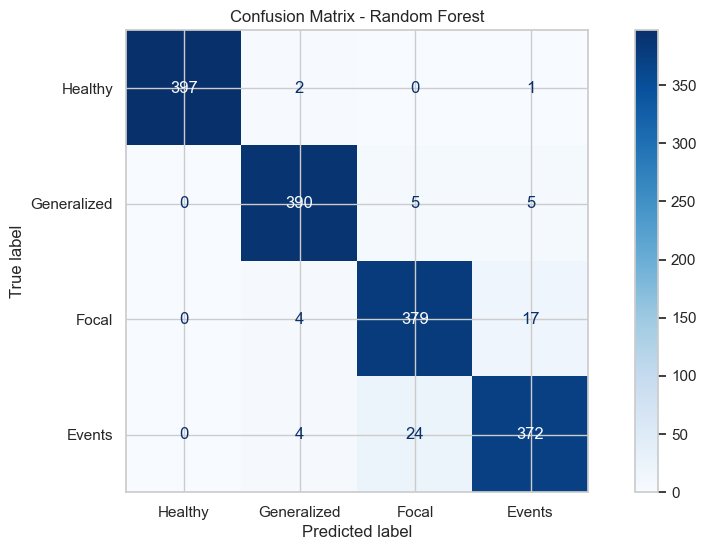

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=["Healthy", "Generalized", "Focal", "Events"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [9]:
import joblib

# Save the trained Random Forest model to a file
model_path = r"C:\Users\saeem\Desktop\Epilepsy\random_forest_beed_model.joblib"
joblib.dump(rf_model, model_path)
joblib.dump(scaler, model_path.replace('.joblib', '_scaler.joblib'))
model_path


'C:\\Users\\saeem\\Desktop\\Epilepsy\\random_forest_beed_model.joblib'